<a href="https://colab.research.google.com/github/devpatel0005/IPL-Player-Salary-Prediction/blob/main/IPL_Player_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Column Descriptions:

*   **Unnamed: 0**: This column likely contains the player's name, as suggested by `df.head()`.
*   **AtBat**: Number of times at bat in the current season.
*   **Hits**: Number of hits in the current season.
*   **HmRun**: Number of home runs in the current season.
*   **Runs**: Number of runs scored in the current season.
*   **RBI**: Runs Batted In in the current season.
*   **Walks**: Number of walks in the current season.
*   **Years**: Number of years the player has played in the major leagues.
*   **CAtBat**: Career number of times at bat.
*   **CHits**: Career number of hits.
*   **CHmRun**: Career number of home runs.
*   **CRuns**: Career number of runs scored.
*   **CRBI**: Career Runs Batted In.
*   **CWalks**: Career number of walks.
*   **League**: The player's league (e.g., 'A' for American League, 'N' for National League).
*   **Division**: The player's division within their league (e.g., 'E' for East, 'W' for West).
*   **PutOuts**: Number of putouts in the current season (defensive statistics).
*   **Assists**: Number of assists in the current season (defensive statistics).
*   **Errors**: Number of errors in the current season (defensive statistics).
*   **Salary**: The player's salary (in thousands of dollars) for the current season (this is your target variable).
*   **NewLeague**: The player's league at the end of the current season.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df=pd.read_csv('https://raw.githubusercontent.com/devpatel0005/IPL-Player-Salary-Prediction/refs/heads/main/Player%20-%2023AIML047%20PATEL%20DEV%20DHARMESH%20-%20Player.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [185]:
df.shape

(322, 21)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [187]:
#here there are not any null values and 4 columns are categorical and rest are numerical

In [188]:
df.isnull().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


In [189]:
#here there are null values in the target variable so we will fix that by fillna method
df['Salary']=df['Salary'].fillna(df['Salary'].median())

In [190]:
df.isnull().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


In [191]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,515.600953
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,409.817459
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [192]:
#we will drop the player names because that feature is irrelavent in prediction of player salaries, rather their performance matters
df.drop('Unnamed: 0',axis=1,inplace=True)

In [193]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['League', 'Division', 'NewLeague'], dtype='object')

In [194]:
df[cat_cols].describe()

,League,Division,NewLeague
count,322,322,322
unique,2,2,2
top,A,W,A
freq,175,165,176


League


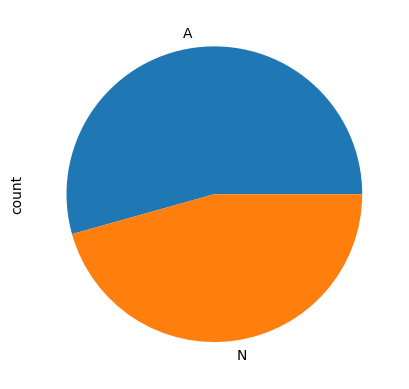

Division


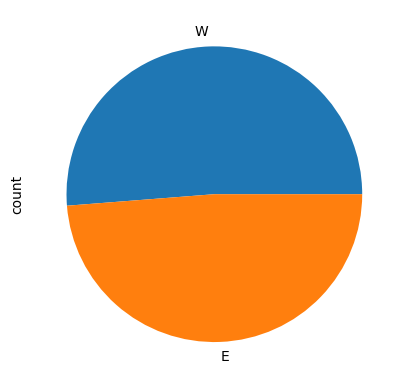

NewLeague


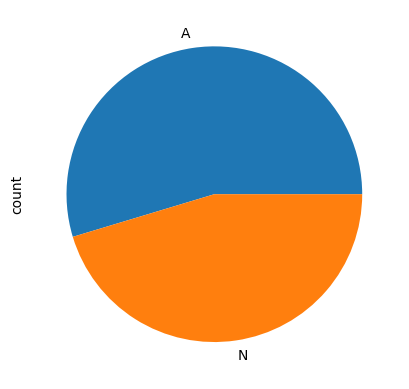

In [195]:
#checking the distribution of the categorical features
for i in cat_cols:
  print(i)
  df[i].value_counts().plot(kind='pie')
  plt.show()

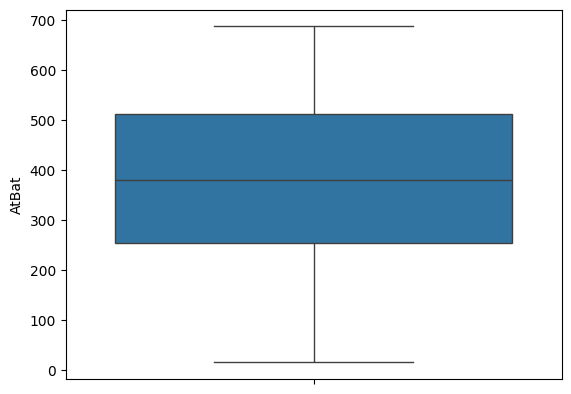

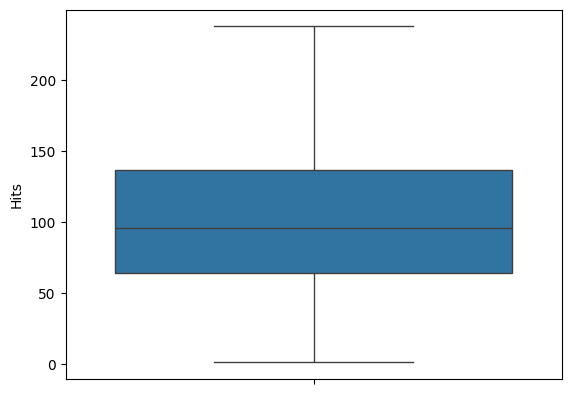

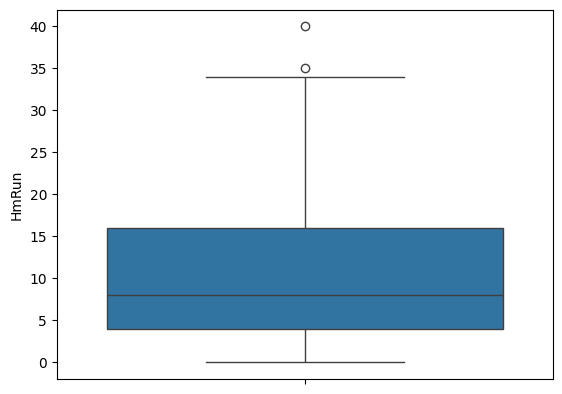

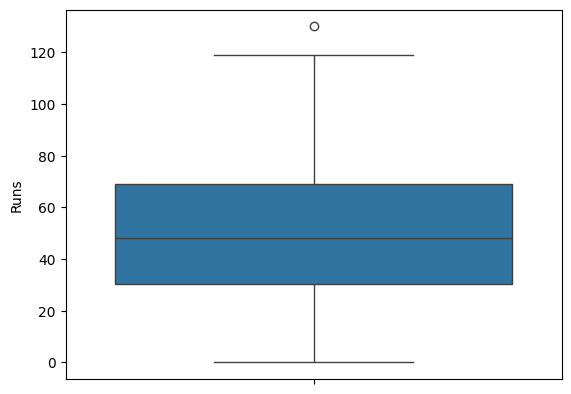

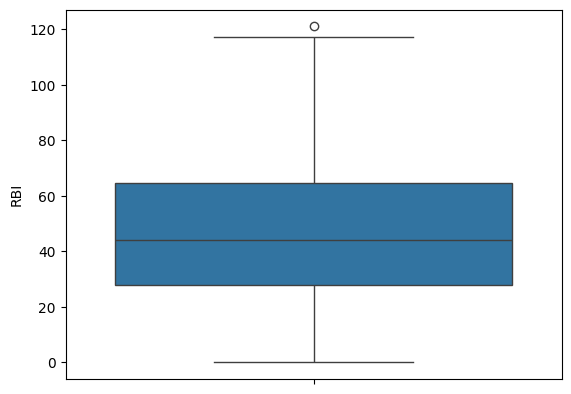

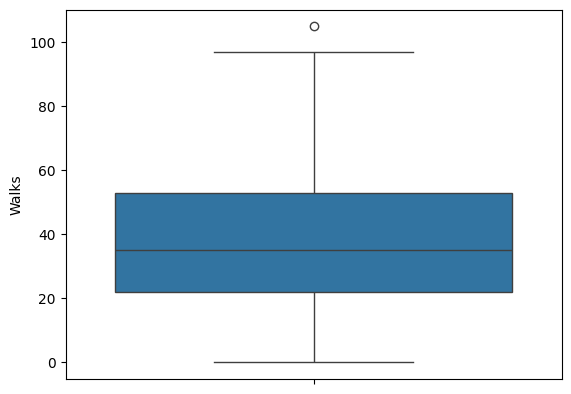

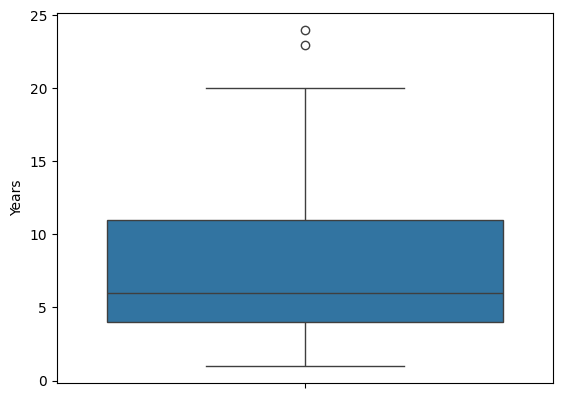

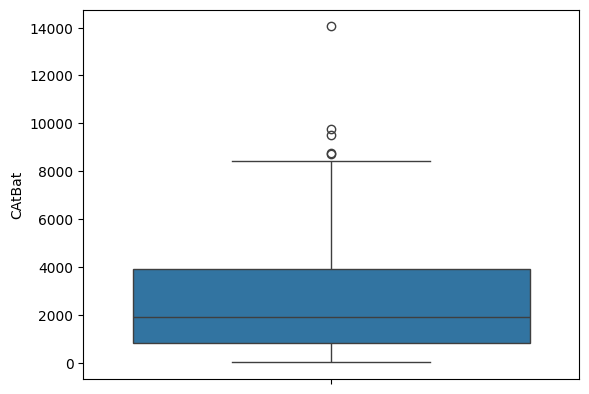

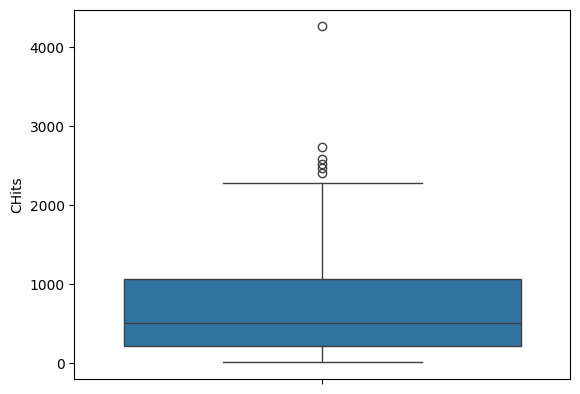

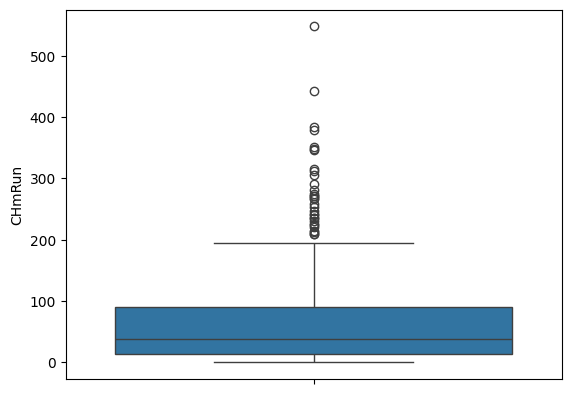

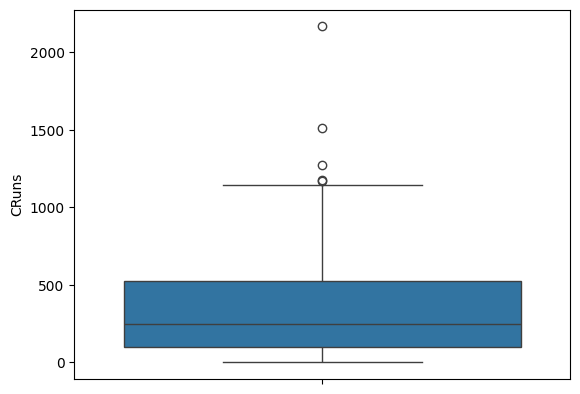

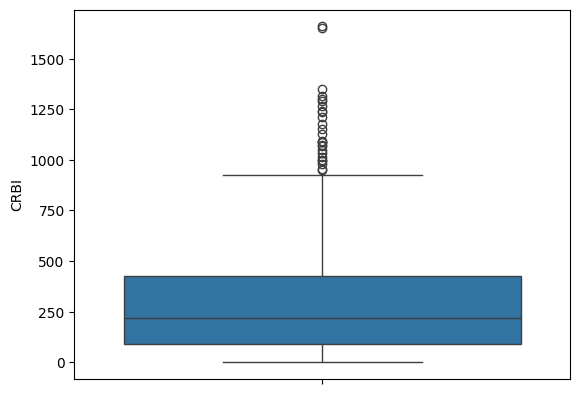

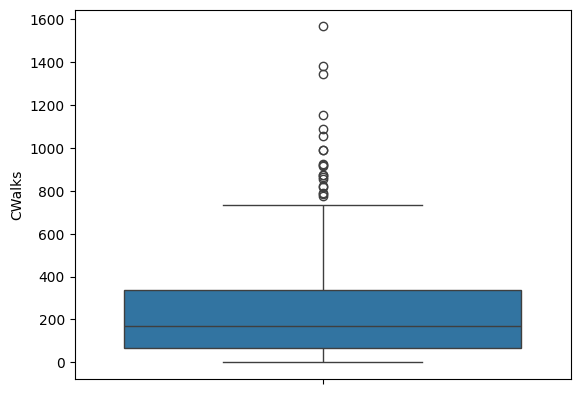

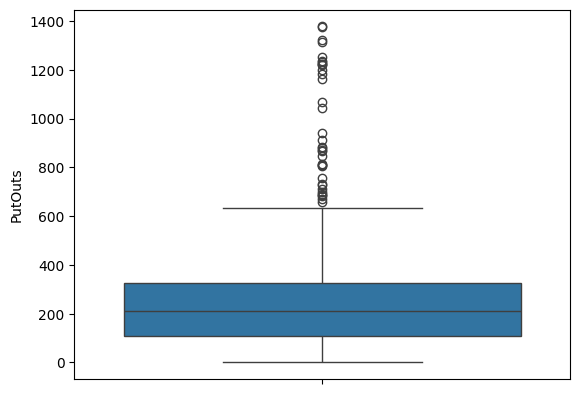

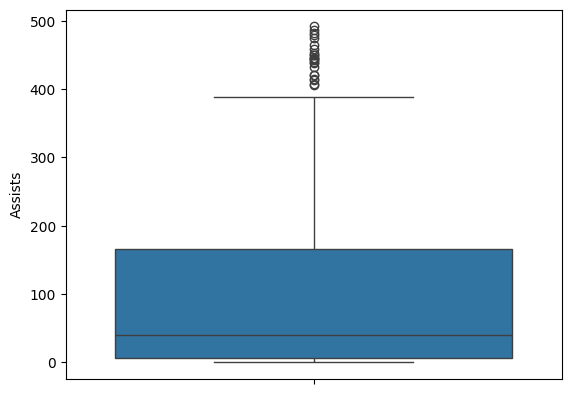

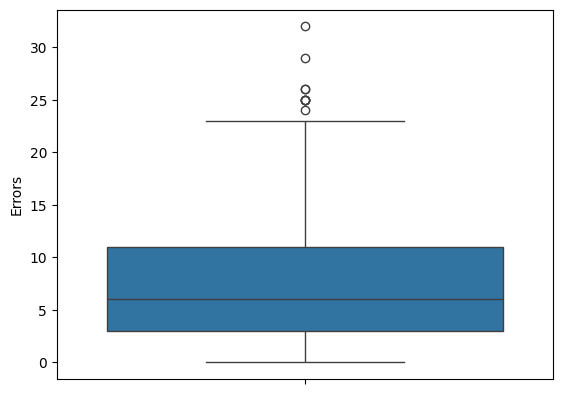

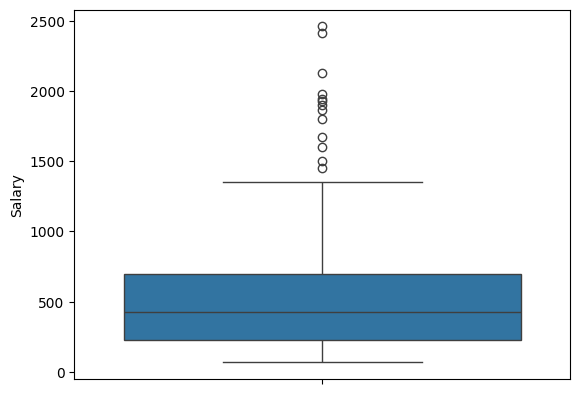

In [196]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [197]:
out_cols=['HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors']
def manage_outliers(df,col):
  for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lr=q1-1.5*iqr
    ur=q3+1.5*iqr
    df[i]=np.where(df[i]>ur,df[i].median(),df[i])
    df[i]=np.where(df[i]<lr,df[i].median(),df[i])
  return df
df=manage_outliers(df,out_cols)

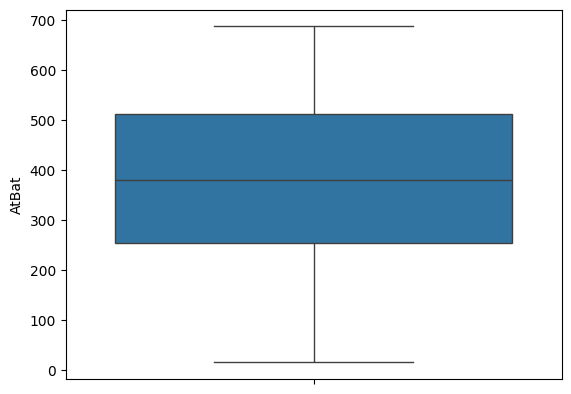

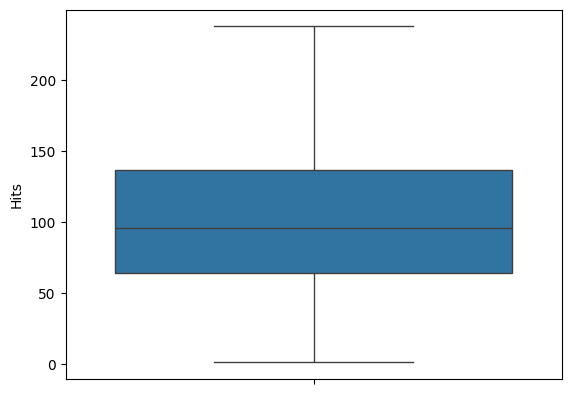

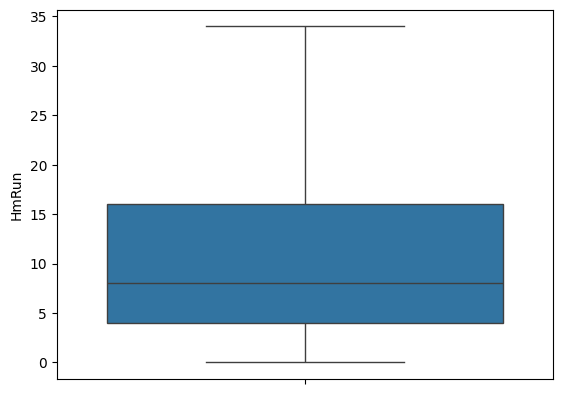

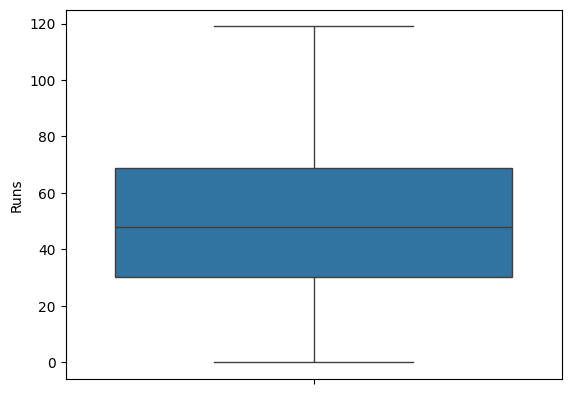

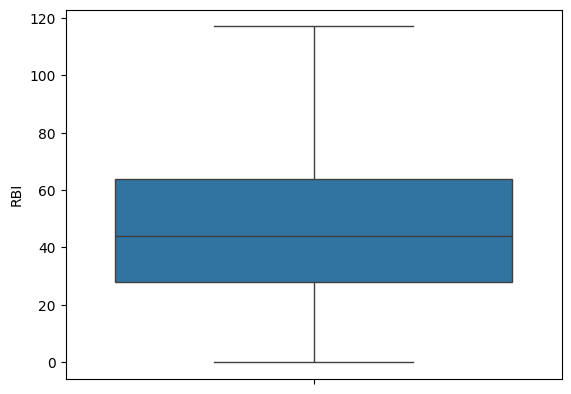

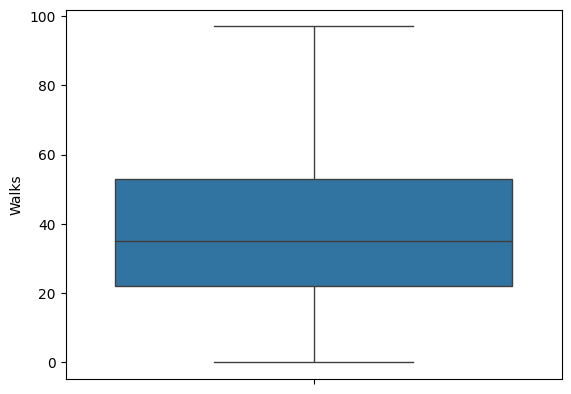

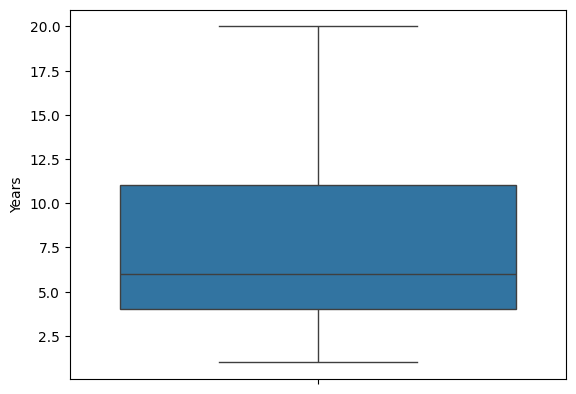

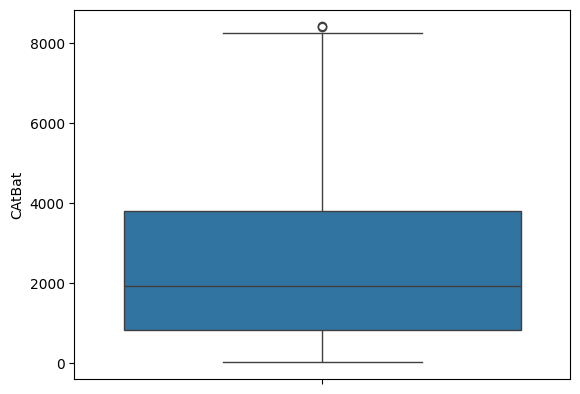

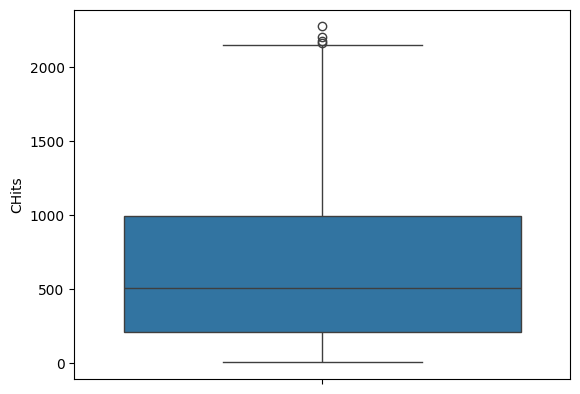

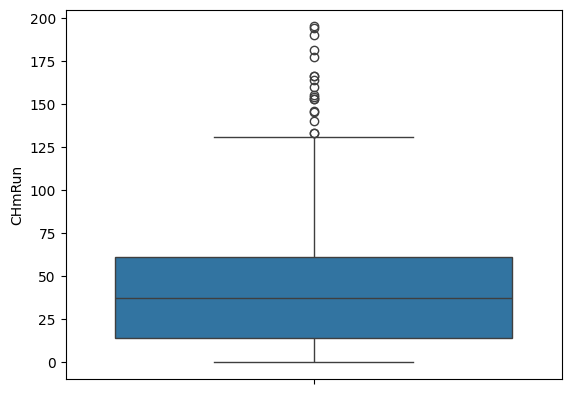

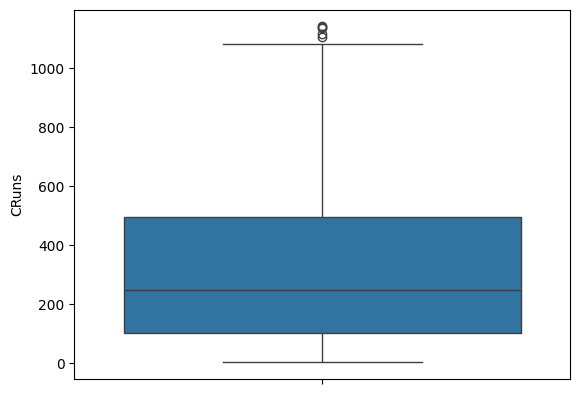

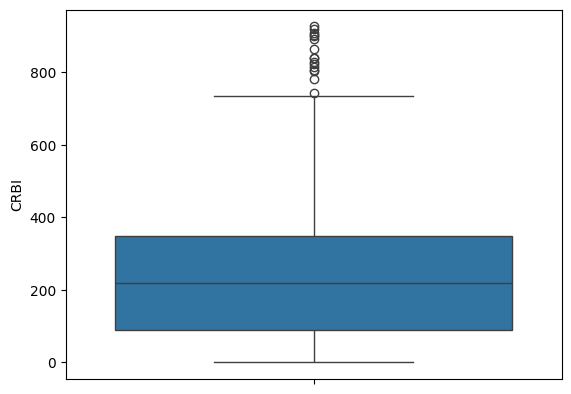

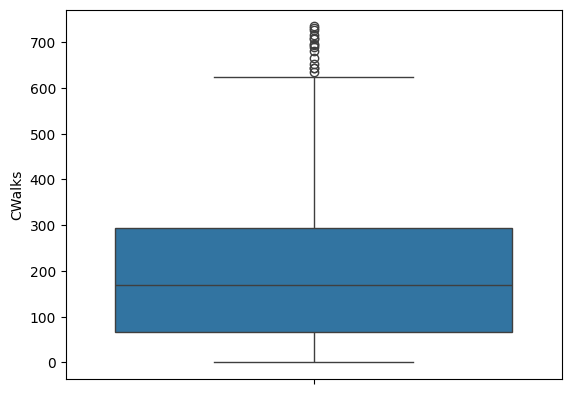

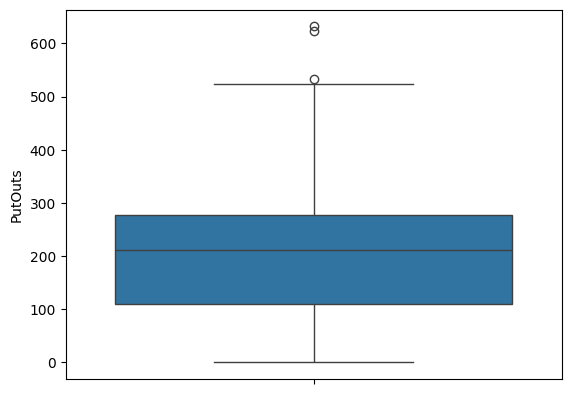

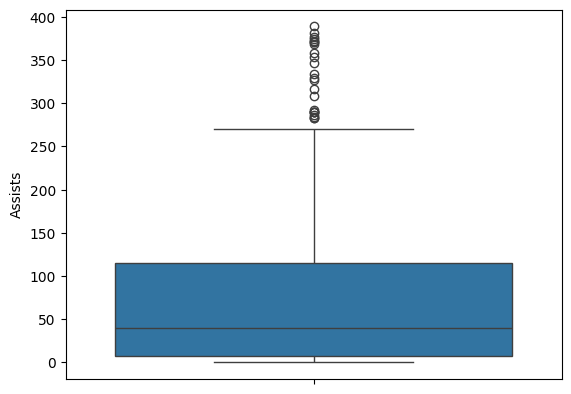

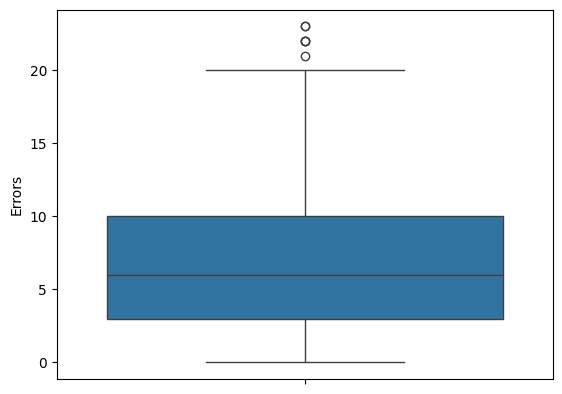

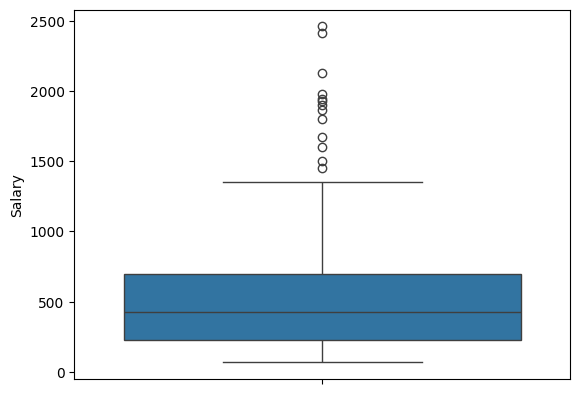

In [198]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

 as you can see that the outliers are managed but still there are some outliers in some columns which we will manage further

In [199]:
# now we will implement the skewness and  its transformations and the VIF method ,correlations,pairplots,scatterpltos, feature selection and then the categorical EDA

In [200]:
skew_col=[]
for i in num_cols:
  if (df[i].skew()>0.75) | (df[i].skew()<-0.75):
    print(i,df[i].skew())
    skew_col.append(i)

HmRun 0.8527187218734238
CAtBat 0.9477173268587822
CHits 0.9706470284134039
CHmRun 1.4306871824061616
CRuns 1.0297090483778653
CRBI 1.2430587005453415
CWalks 1.1939619837057696
Assists 1.5112009140201534
Errors 0.837482878884217
Salary 1.8736106075882106


In [201]:
skew_col.remove('Salary')

In [202]:
skew_col

['HmRun',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Assists',
 'Errors']

In [203]:
for i in skew_col:
  df[i]=np.log1p(df[i])

In [204]:
print(df[skew_col].skew())

HmRun     -0.640222
CAtBat    -0.902002
CHits     -0.892461
CHmRun    -0.813796
CRuns     -0.889251
CRBI      -0.999232
CWalks    -0.949462
Assists   -0.267164
Errors    -0.699439
dtype: float64


In [205]:
df.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


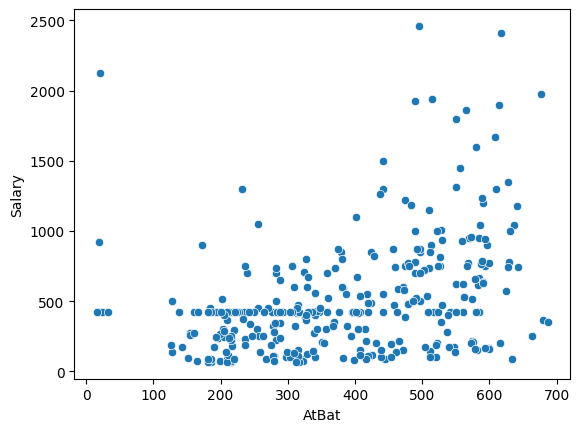

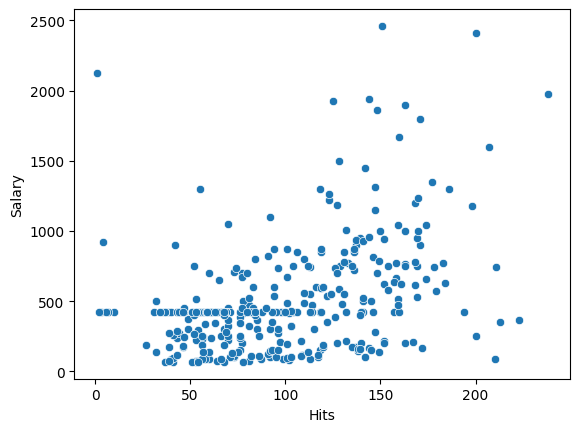

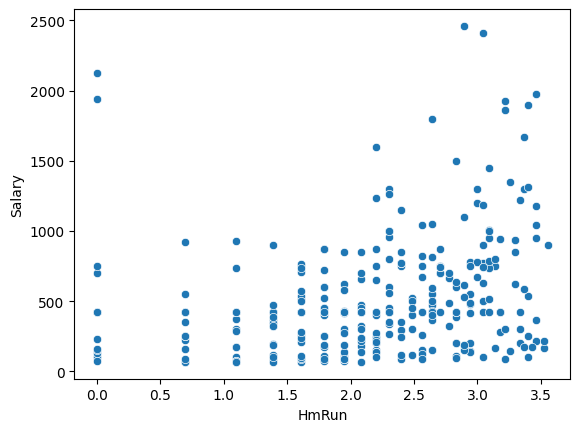

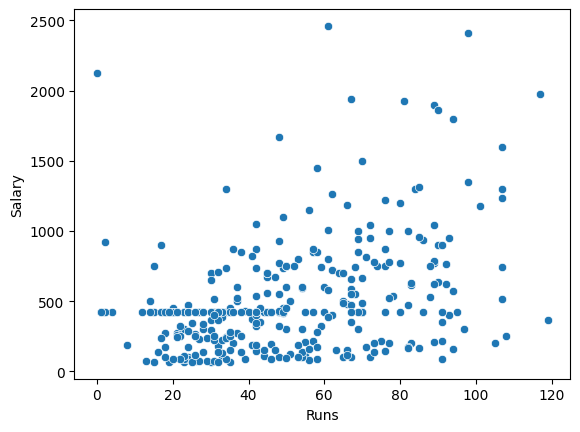

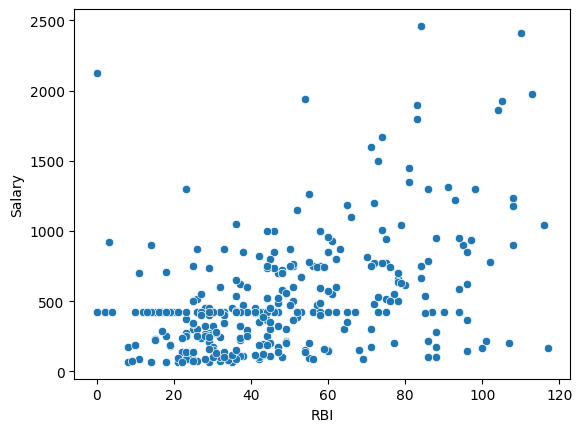

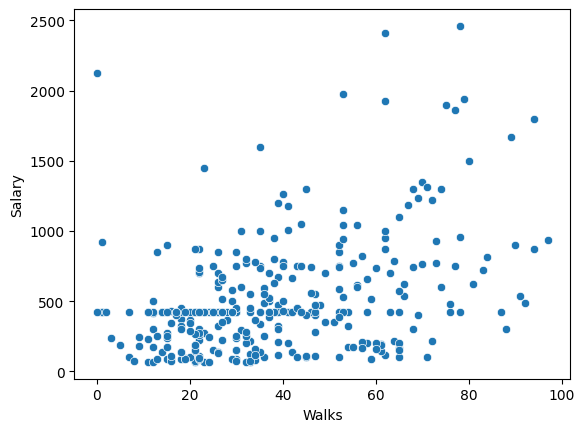

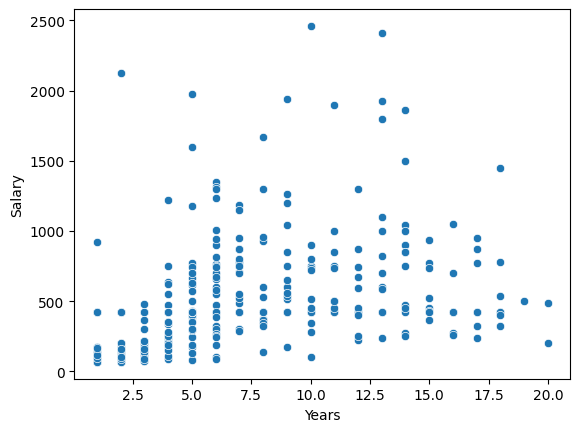

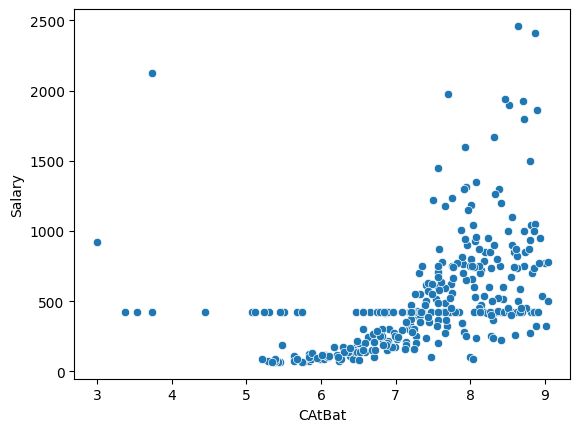

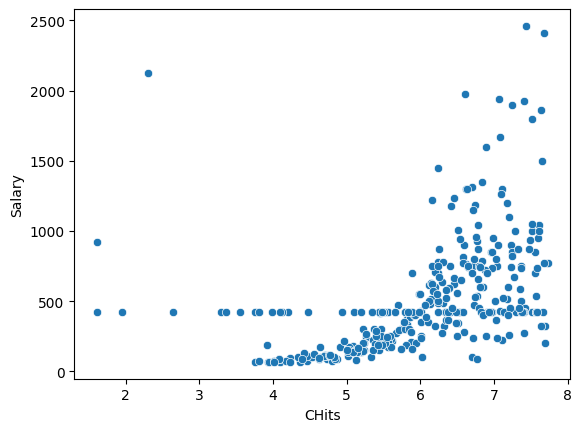

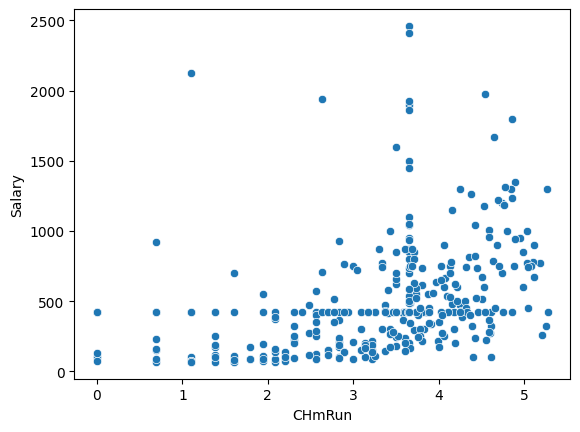

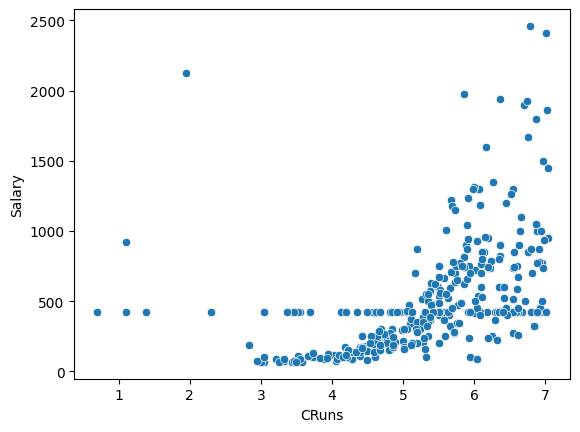

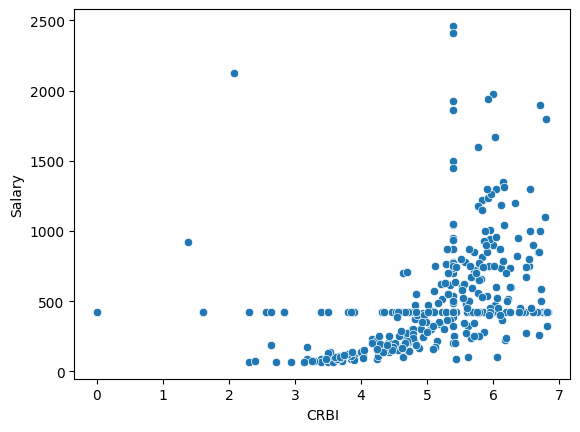

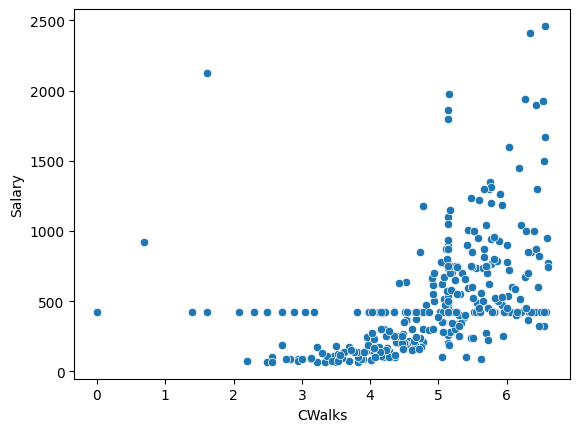

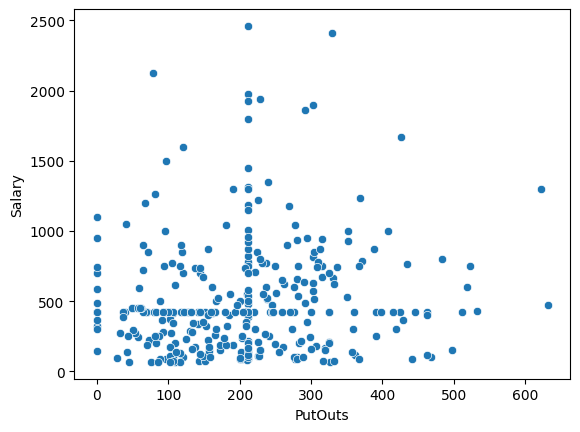

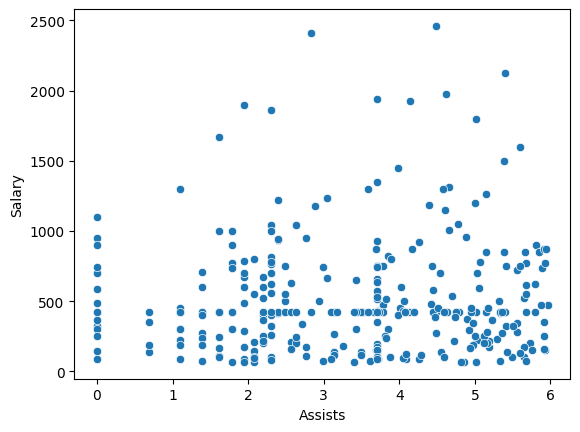

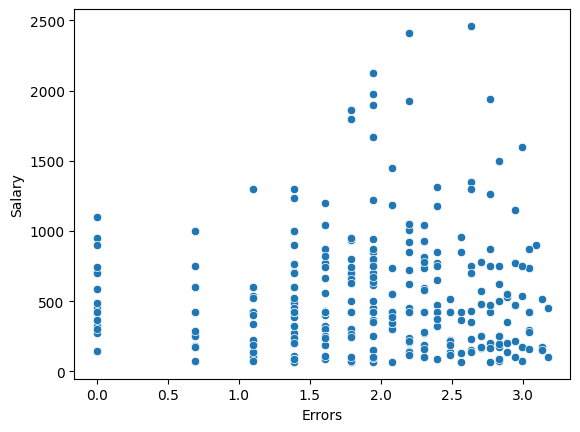

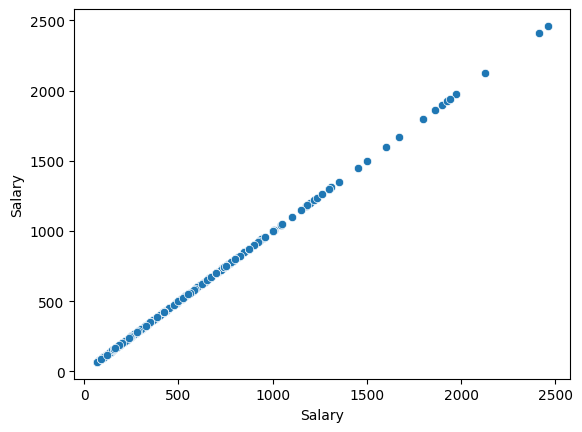

In [206]:
for i in num_cols:
  sns.scatterplot(data=df,x=i,y='Salary')
  plt.show()

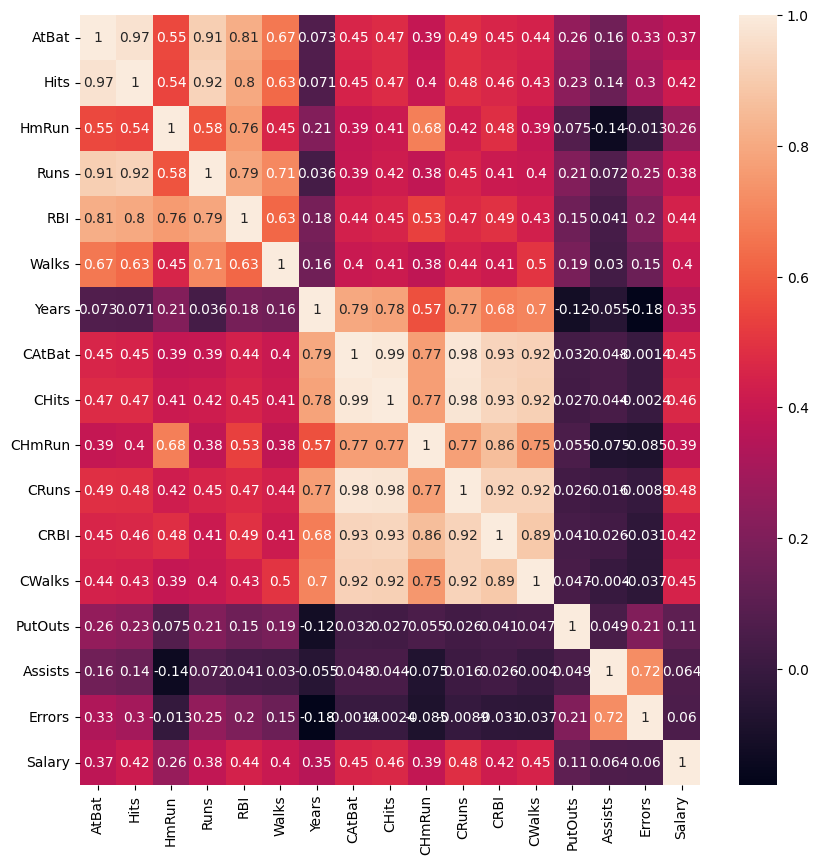

In [207]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

In [208]:
#first we will convert categorical features into numerical features
#since there are only three features we will convert into numerical by get_dummies function of pandas which will create a new columns
#here used drop_first=True to avoid multicollinearity
new_df=pd.get_dummies(df[cat_cols],drop_first=True)
new_df.head()
df=pd.concat([new_df,df.drop(cat_cols,axis=1)],axis=1)
df.head()

,League_N,Division_W,NewLeague_N,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,False,False,False,293,66,0.693147,30.0,29.0,14.0,1.0,5.683580,4.204693,0.693147,3.433987,3.401197,2.708050,446.0,3.526361,3.044522,425.0
1,True,True,True,315,81,2.079442,24.0,38.0,39.0,14.0,8.146130,6.728629,4.248495,5.774552,6.028279,5.929589,632.0,3.784190,2.397895,475.0
2,False,True,False,479,130,2.944439,66.0,72.0,76.0,3.0,7.393263,6.126869,4.158883,5.416100,5.587249,5.575949,212.0,4.418841,2.708050,480.0
3,True,False,True,496,141,3.044522,65.0,78.0,37.0,11.0,8.635687,7.362645,3.650658,6.720220,6.732211,5.872118,200.0,2.484907,1.386294,500.0
4,True,False,True,321,87,2.397895,39.0,42.0,30.0,2.0,5.983936,4.624973,2.564949,3.891820,3.850148,3.526361,212.0,3.713572,1.609438,91.5


In [209]:
#here the categorical are converted into numerical and as we can see that true false values the model can read that 0 1 values no need of mapping

In [210]:
#here we can see that there is much multi colinearity so we will implement the VIF method
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert boolean columns to integer (0 or 1)
for col in ['League_N', 'Division_W', 'NewLeague_N']:
    df[col] = df[col].astype(int)

vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF Values']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [211]:
vif[vif['VIF Values']>10]

,Features,VIF Values
3,AtBat,159.383147
4,Hits,139.616019
5,HmRun,28.092213
6,Runs,53.539771
7,RBI,26.503658
8,Walks,12.565667
9,Years,13.336780
10,CAtBat,880.806760
11,CHits,1429.427960
12,CHmRun,60.818967


In [212]:
#we will drop the CAtBat column since it has very high VIF and it is less correlated with the target variable among the very high vif features.
df.drop(['CHits'],axis=1,inplace=True)

In [213]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [214]:
#here we will add polynomial features since there is non linear relationship between the features with the target variable

In [215]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_poly=pf.fit_transform(x)

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=0)

In [217]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [218]:
print(x_train_sc.shape)
print(x_test_sc.shape)

(257, 190)
(65, 190)


In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train_sc,y_train)
y_pred_train=lr.predict(x_train_sc)
y_pred_test=lr.predict(x_test_sc)
print("Train: ",r2_score(y_train,y_pred_train))
print("test: ",r2_score(y_test,y_pred_test))

Train:  0.9461138739826962
test:  -1.5472977277732989


In [220]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train_sc,y_train)
y_pred_train=dtr.predict(x_train_sc)
y_pred_test=dtr.predict(x_test_sc)
print("Train: ",r2_score(y_train,y_pred_train))
print("test: ",r2_score(y_test,y_pred_test))


Train:  1.0
test:  0.05090242753473195


In [221]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train_sc,y_train)
y_pred_train=rf.predict(x_train_sc)
y_pred_test=rf.predict(x_test_sc)
print("Train: ",r2_score(y_train,y_pred_train))
print("test: ",r2_score(y_test,y_pred_test))

Train:  0.9228439574123204
test:  0.5891094896232957


In [222]:
from sklearn.linear_model import LassoCV
alpha=[0.001,0.01,0.1,1,10,100,1000]
lcv=LassoCV(alphas=alpha,max_iter=15000,cv=5)
lcv.fit(x_train_sc,y_train)
y_pred_train=lcv.predict(x_train_sc)
y_pred_test=lcv.predict(x_test_sc)
print("Train: ",r2_score(y_train,y_pred_train))
print("test: ",r2_score(y_test,y_pred_test))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 699168.0125742138, tolerance: 3498.5507834358896
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902988.7893381973, tolerance: 3498.5507834358896
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801417.0842490749, tolerance: 3498.5507834358896
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergence

Train:  0.5624990843091444
test:  0.5960342923940107


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644321.3476443822, tolerance: 3450.878618417283
  model = cd_fast.enet_coordinate_descent_gram(


In [223]:
from sklearn.linear_model import RidgeCV
alpha=[0.001,0.01,0.1,1,10,100,1000]
rcv=RidgeCV(alphas=alpha,cv=5)
rcv.fit(x_train_sc,y_train)
y_pred_train=rcv.predict(x_train_sc)
y_pred_test=rcv.predict(x_test_sc)
print("Train: ",r2_score(y_train,y_pred_train))
print("test: ",r2_score(y_test,y_pred_test))

Train:  0.702572790594503
test:  0.6051748144564957
